<a href="https://colab.research.google.com/github/kltu8790/Machine-Learning-with-Python/blob/master/sanbul_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1-1.Data 불러오기

In [2]:
fires = pd.read_csv("/content/Termproject/datasets/sanbul/sanbul.csv")

# 1-2.fires.head(),fires.info(),fires.describe(), 카테고리형 특성 month, day에 대해 value_counts()출력하기

In [3]:
fires.head()

,latitude,longitude,month,day,avg_temp,max_temp,max_wind_speed,avg_wind,burned_area
0,37.814760,126.934555,12-Dec,04-thu,-11.2,-7.5,8.4,2.3,0.03
1,37.902374,127.531013,11-Nov,02-tue,2.6,11.2,5.9,0.8,0.10
2,37.815010,127.303115,03-Mar,05-fri,13.2,21.5,5.7,1.3,0.50
3,37.645414,127.504775,02-Feb,06-sat,-4.0,1.1,10.4,2.5,0.30
4,37.811693,127.514488,06-Jun,00-sun,23.0,32.1,6.7,1.7,0.08


In [4]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        456 non-null    float64
 1   longitude       456 non-null    float64
 2   month           456 non-null    object 
 3   day             456 non-null    object 
 4   avg_temp        456 non-null    float64
 5   max_temp        456 non-null    float64
 6   max_wind_speed  456 non-null    float64
 7   avg_wind        456 non-null    float64
 8   burned_area     456 non-null    float64
dtypes: float64(7), object(2)
memory usage: 32.2+ KB


In [5]:
fires.describe()

,latitude,longitude,avg_temp,max_temp,max_wind_speed,avg_wind,burned_area
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,37.554922,127.152073,9.810088,17.717763,7.692982,1.601316,0.282675
std,0.289899,0.267260,8.278386,8.878393,2.073081,0.581168,0.596268
min,36.878411,126.447779,-15.400000,-10.600000,3.600000,0.500000,0.010000
25%,37.339854,126.934403,5.075000,12.475000,6.100000,1.200000,0.020000
50%,37.561472,127.176612,9.500000,17.800000,7.400000,1.500000,0.100000
75%,37.786237,127.343083,14.800000,23.925000,8.800000,1.900000,0.300000
max,38.178624,127.743580,30.200000,36.800000,16.600000,3.900000,7.000000


In [6]:
fires["month"].value_counts() / len(fires)

03-Mar    0.375000
04-Apr    0.219298
02-Feb    0.098684
06-Jun    0.087719
05-May    0.081140
01-Jan    0.032895
11-Nov    0.030702
12-Dec    0.019737
09-Sep    0.017544
10-Oct    0.017544
08-Aug    0.010965
07-Jul    0.008772
Name: month, dtype: float64

In [7]:
fires["day"].value_counts() / len(fires)

06-sat    0.175439
01-mon    0.157895
00-sun    0.155702
05-fri    0.140351
03-wed    0.125000
02-tue    0.116228
04-thu    0.111842
07-hol    0.017544
Name: day, dtype: float64

# 1-3. 데이터 시각화

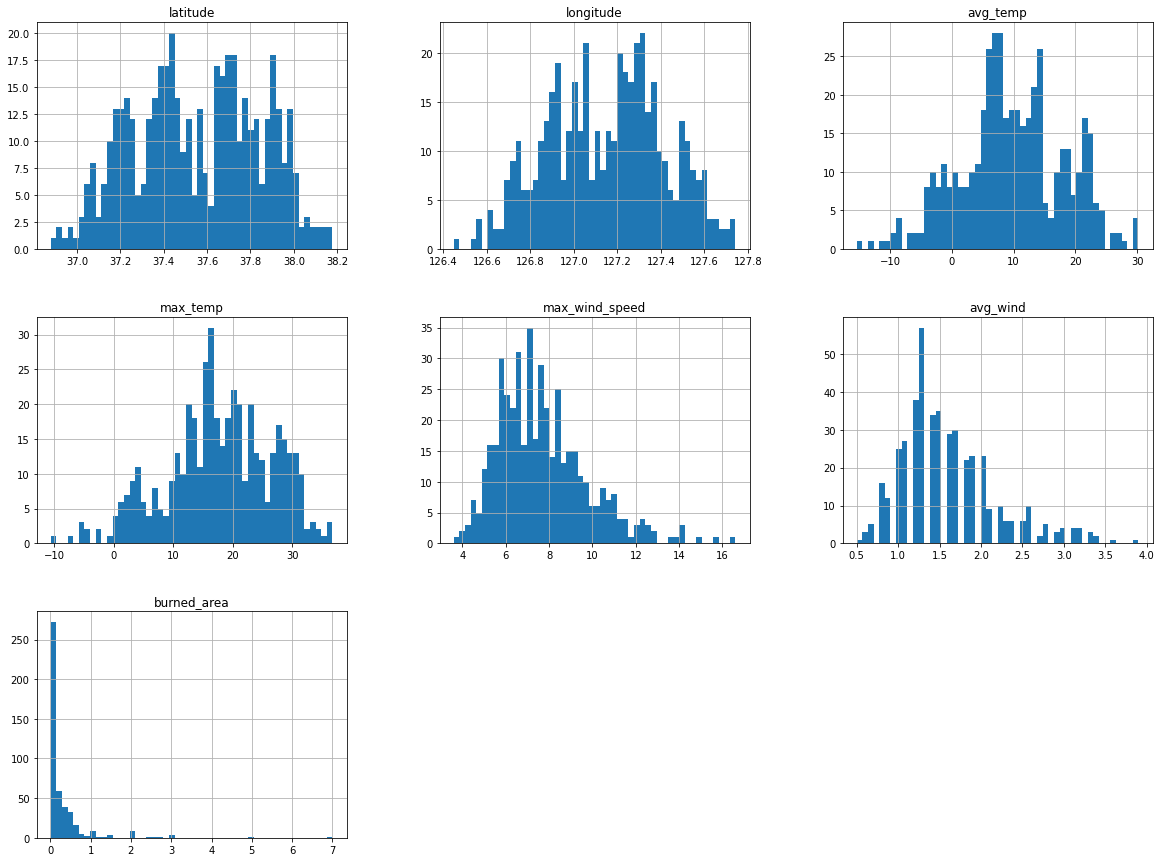

In [8]:
fires.hist(bins=50, figsize=(20, 15))
plt.show()

# 1-4.특성 burned_area 왜곡 현상 아래 왼쪽 그림 ) 개선을 위해 로그 함수 (y=ln(burned_area+ 를 이용한 변환

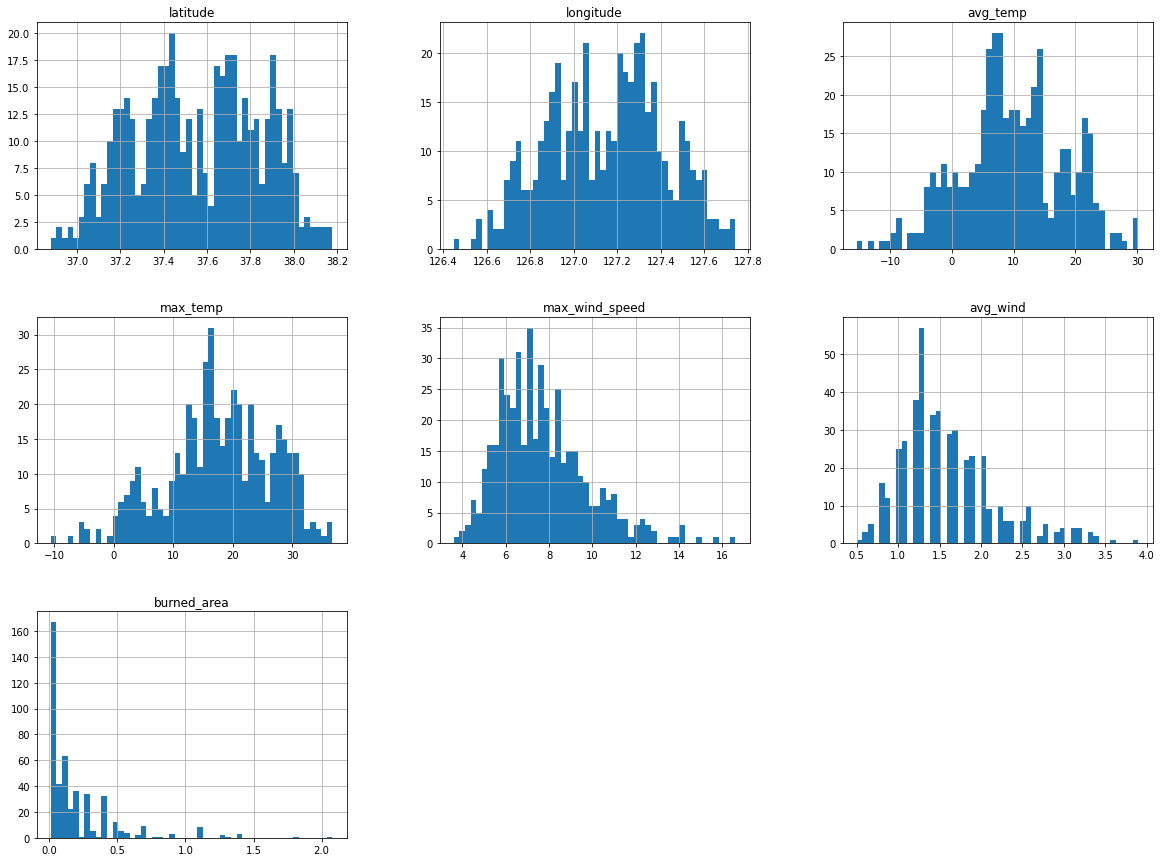

In [9]:
fires['burned_area'] = np.log(fires['burned_area'] + 1)
fires.hist(bins=50, figsize=(20, 15))
plt.show()

# 1-5. Scikit Learn 의 train_test_split 을 이용 하여 training/test set 분리 / Test set 비율 확인하기

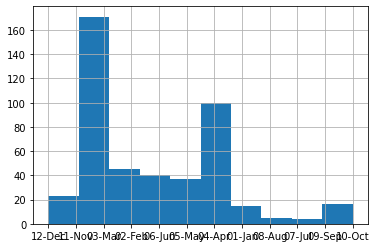

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fires, test_size=0.2, random_state=42)

test_set.head()

fires["month"].hist()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(fires, fires["month"]):
    strat_train_set = fires.loc[train_index]
    strat_test_set = fires.loc[test_index]

print("\nMonth category proportion: \n",
      strat_test_set["month"].value_counts() / len(strat_test_set))

print("\nOverall month category proportion: \n",
      fires["month"].value_counts() / len(fires))


Month category proportion: 
 03-Mar    0.369565
04-Apr    0.217391
02-Feb    0.097826
06-Jun    0.086957
05-May    0.076087
11-Nov    0.032609
01-Jan    0.032609
09-Sep    0.021739
12-Dec    0.021739
10-Oct    0.021739
08-Aug    0.010870
07-Jul    0.010870
Name: month, dtype: float64

Overall month category proportion: 
 03-Mar    0.375000
04-Apr    0.219298
02-Feb    0.098684
06-Jun    0.087719
05-May    0.081140
01-Jan    0.032895
11-Nov    0.030702
12-Dec    0.019737
09-Sep    0.017544
10-Oct    0.017544
08-Aug    0.010965
07-Jul    0.008772
Name: month, dtype: float64


# 1-6. Pandas scatter_matrix () 함수를 이용하여 4 개 이상의 특성 에 대해 matrix 출력하기

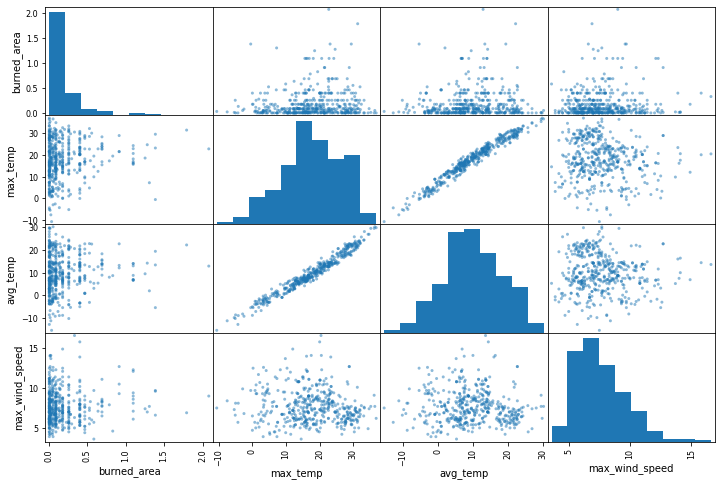

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["burned_area", "max_temp", "avg_temp", "max_wind_speed"]
scatter_matrix(fires[attributes], figsize=(12, 8))
plt.show()

# 1-7. 지역별로 ‘burned_ 에 대해 plot 하기 : 원의 반경은 max_temp( 옵션 s), 컬러는 burned_area( 옵션 c) 를 의미

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


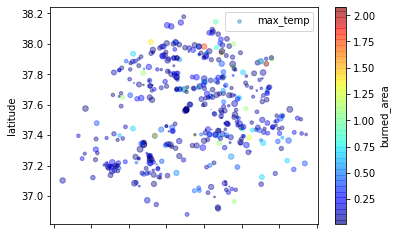

In [13]:
fires.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
           s=fires["max_temp"], label="max_temp",
           c="burned_area", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

# 1-8 corr() 함수를 이용 하여 타깃 클래스 (burned_area) 에 대한 correlation matrix 출력하기

In [15]:
corr_matrix = fires.corr()
print("\nCORR_MATRIX:\n")
print(corr_matrix["burned_area"].sort_values(ascending=False))


CORR_MATRIX:

burned_area       1.000000
longitude         0.122639
max_temp          0.105072
avg_temp          0.073085
latitude          0.056732
max_wind_speed    0.054658
avg_wind          0.009103
Name: burned_area, dtype: float64


#1-9. 카테고리형 특성 month, day 에 대해 OneHotEncoder()를 이용한 인코딩 출력

In [16]:
fires = strat_train_set.drop(["burned_area"], axis=1)  # drop labels for training set
fires_labels = strat_train_set["burned_area"].copy()

fires_num = fires.drop(["month", "day"], axis=1)

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

fires_cat = fires[["month"]]
fires_cat_1hot = cat_encoder.fit_transform(fires_cat)
print("\nfires_cat_1hot: \n", fires_cat_1hot)


fires_cat_1hot: 
   (0, 3)	1.0
  (1, 5)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 3)	1.0
  (7, 8)	1.0
  (8, 8)	1.0
  (9, 4)	1.0
  (10, 2)	1.0
  (11, 4)	1.0
  (12, 10)	1.0
  (13, 2)	1.0
  (14, 3)	1.0
  (15, 2)	1.0
  (16, 5)	1.0
  (17, 2)	1.0
  (18, 4)	1.0
  (19, 1)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 3)	1.0
  (23, 3)	1.0
  (24, 1)	1.0
  :	:
  (339, 4)	1.0
  (340, 10)	1.0
  (341, 5)	1.0
  (342, 3)	1.0
  (343, 0)	1.0
  (344, 3)	1.0
  (345, 1)	1.0
  (346, 3)	1.0
  (347, 3)	1.0
  (348, 4)	1.0
  (349, 2)	1.0
  (350, 1)	1.0
  (351, 9)	1.0
  (352, 3)	1.0
  (353, 3)	1.0
  (354, 3)	1.0
  (355, 2)	1.0
  (356, 1)	1.0
  (357, 2)	1.0
  (358, 3)	1.0
  (359, 4)	1.0
  (360, 2)	1.0
  (361, 2)	1.0
  (362, 2)	1.0
  (363, 2)	1.0


# 1-10.Scikit Learn 의 Pipeline , StandardScaler 를 이용하여 카테고리형 특성을 인코딩한 training set 생성하기

In [17]:
print("\n\nAlternatively, you can set sparse=False when creating the OneHotEncoder:")
cat_encoder = OneHotEncoder(sparse=False)
fires_cat_1hot = cat_encoder.fit_transform(fires_cat)
print("\ncat_month_encoder.categories_: \n", cat_encoder.categories_)



Alternatively, you can set sparse=False when creating the OneHotEncoder:

cat_month_encoder.categories_: 
 [array(['01-Jan', '02-Feb', '03-Mar', '04-Apr', '05-May', '06-Jun',
       '07-Jul', '08-Aug', '09-Sep', '10-Oct', '11-Nov', '12-Dec'],
      dtype=object)]


In [18]:
cat_encoder2 = OneHotEncoder()
fires_cat = fires[["day"]]
fires_cat_1hot_2 = cat_encoder2.fit_transform(fires_cat)
print("\nfires_cat_1hot_2: \n", fires_cat_1hot_2)


fires_cat_1hot_2: 
   (0, 5)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (5, 6)	1.0
  (6, 1)	1.0
  (7, 7)	1.0
  (8, 7)	1.0
  (9, 4)	1.0
  (10, 6)	1.0
  (11, 2)	1.0
  (12, 6)	1.0
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 1)	1.0
  (17, 6)	1.0
  (18, 7)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 6)	1.0
  (22, 6)	1.0
  (23, 0)	1.0
  (24, 5)	1.0
  :	:
  (339, 2)	1.0
  (340, 1)	1.0
  (341, 0)	1.0
  (342, 1)	1.0
  (343, 0)	1.0
  (344, 0)	1.0
  (345, 0)	1.0
  (346, 6)	1.0
  (347, 5)	1.0
  (348, 3)	1.0
  (349, 3)	1.0
  (350, 4)	1.0
  (351, 4)	1.0
  (352, 2)	1.0
  (353, 3)	1.0
  (354, 5)	1.0
  (355, 0)	1.0
  (356, 1)	1.0
  (357, 3)	1.0
  (358, 5)	1.0
  (359, 2)	1.0
  (360, 5)	1.0
  (361, 2)	1.0
  (362, 3)	1.0
  (363, 2)	1.0


In [20]:
print("\n\nAlternatively, you can set sparse=False when creating the OneHotEncoder:")
cat_encoder2 = OneHotEncoder(sparse=False)
fires_cat_1hot_2 = cat_encoder2.fit_transform(fires_cat)
print("\ncat_day_encoder.categories_: \n", cat_encoder2.categories_)



Alternatively, you can set sparse=False when creating the OneHotEncoder:

cat_day_encoder.categories_: 
 [array(['00-sun', '01-mon', '02-tue', '03-wed', '04-thu', '05-fri',
       '06-sat', '07-hol'], dtype=object)]


In [21]:
print("\n\n\n##################################################")
print("Now let's build a pipeline for preprocessing the numerical attributes:")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
fires_num_tr = num_pipeline.fit_transform(fires_num)
print("\nfires_num_tr: \n", fires_num_tr)




##################################################
Now let's build a pipeline for preprocessing the numerical attributes:

fires_num_tr: 
 [[ 1.57238451 -0.82962957  0.44533466  0.61797222  0.86240366 -0.19289834]
 [-0.81733668  0.20170363  1.79577391  1.77216499 -0.06757688 -1.013167  ]
 [ 0.54252478  0.111668    0.22435369 -0.10196981  1.55988906  1.6116927 ]
 ...
 [-1.60511765 -1.12081678  0.33484418 -0.05625921  1.00190074  2.43196136]
 [-1.06300201 -1.07035545 -1.12608555 -1.29044554  0.25791631  0.13520912]
 [-1.08866791 -1.92813657  0.02792617 -0.05625921 -1.27655159 -0.02884461]]


In [22]:
from sklearn.compose import ColumnTransformer

num_attribs = list(fires_num)
cat_attribs = ["month", "day"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

fires_prepared = full_pipeline.fit_transform(fires)

print("\nfires prepared:", fires_prepared)
print("\nfires prepared shape:", fires_prepared.shape)


fires prepared: [[ 1.57238451 -0.82962957  0.44533466 ...  1.          0.
   0.        ]
 [-0.81733668  0.20170363  1.79577391 ...  0.          0.
   0.        ]
 [ 0.54252478  0.111668    0.22435369 ...  0.          0.
   0.        ]
 ...
 [-1.60511765 -1.12081678  0.33484418 ...  0.          0.
   0.        ]
 [-1.06300201 -1.07035545 -1.12608555 ...  0.          0.
   0.        ]
 [-1.08866791 -1.92813657  0.02792617 ...  0.          0.
   0.        ]]

fires prepared shape: (364, 26)


# 2.모델 개발

① SGD Regression (SGD)

② Support Vector Machine (SVM)

③ Decision Tree (DT)

④ Random Forest (RF)


위4 가지 모델에 대해 2 1 ~ 2 5 까지 모두 답하시오

2-1.GridSearchCV 를 통해 Best 모델 구하기

2-2. mean_squared_error 이용 => training set 에 대해 RMSE 구하기

2-3. 각 모델에 대한 학습 곡선 (learning curves) 그리기

참조 : 제 06 강 실습과제 #6 Training Models [2] Polynomial Regression.pdf

2-4. cross_val_score 를 이용하여 RMSE score 출력하기

2-5. mean_squared_error 이용 => test set 에 대해 RMSE 구하기


# 2-1.GridSearchCV 를 통해 Best 모델 구하기

In [23]:
# 2-1
# sgd
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(fires_prepared, fires_labels)
from sklearn.model_selection import GridSearchCV

print("2-1_sgd_reg.get_params().keys(): ", sgd_reg.get_params().keys())

params_sgd = [{'alpha': [0.1, 0.5], 'epsilon': [0.1, 1]},
              {'alpha': [0.5, 0.6], 'epsilon': [0.1, 0.7]}, ]

grid_search_cv = GridSearchCV(sgd_reg, params_sgd, verbose=1, cv=10)
grid_search_cv.fit(fires_prepared, fires_labels)

sgd_best_model_cv = grid_search_cv.best_estimator_
print(sgd_best_model_cv)

2-1_sgd_reg.get_params().keys():  dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Fitting 10 folds for each of 8 candidates, totalling 80 fits
SGDRegressor(alpha=0.1, eta0=0.1, penalty=None, random_state=42)


In [24]:
# svm
from sklearn.svm import SVR

svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_reg.fit(fires_prepared, fires_labels)

print("2-1_svm_reg.get_params().keys(): ", svm_reg.get_params().keys())

params_svm = {'kernel': ["linear", "poly", "rbf"],
              'C': [0.1, 1, 10, 100],
              'degree': [2, 3, 4],
              'epsilon': [0.1, 1.0, 1.5]}

grid_search_cv = GridSearchCV(svm_reg, params_svm, verbose=1, cv=10)
grid_search_cv.fit(fires_prepared, fires_labels)

svm_best_model_cv = grid_search_cv.best_estimator_
print(svm_best_model_cv)

2-1_svm_reg.get_params().keys():  dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
SVR(C=0.1, degree=2, kernel='linear')


In [25]:
# dt
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(fires_prepared, fires_labels)

print("2-1_tree_reg.get_params().keys(): ", tree_reg.get_params().keys())

params_tree = [{'max_features': [2, 4, 6, 8]},
               {'max_features': [2, 3, 4]}, ]

grid_search_cv = GridSearchCV(tree_reg, params_tree, verbose=1, cv=10)
grid_search_cv.fit(fires_prepared, fires_labels)

tree_best_model_cv = grid_search_cv.best_estimator_
print(tree_best_model_cv)

2-1_tree_reg.get_params().keys():  dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
Fitting 10 folds for each of 7 candidates, totalling 70 fits
DecisionTreeRegressor(max_depth=2, max_features=3, random_state=42)


In [26]:
# rf
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(fires_prepared, fires_labels)

print("2-1_forest_reg.get_params().keys(): ", forest_reg.get_params().keys())

params_forest = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
                 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, ]

grid_search_cv = GridSearchCV(forest_reg, params_forest, verbose=1, cv=10)
grid_search_cv.fit(fires_prepared, fires_labels)

forest_best_model_cv = grid_search_cv.best_estimator_
print(forest_best_model_cv)

2-1_forest_reg.get_params().keys():  dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
Fitting 10 folds for each of 18 candidates, totalling 180 fits
RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)


# 2-2. mean_squared_error 이용 => training set 에 대해 RMSE 구하기

In [27]:
# 2-2
# sgd
from sklearn.metrics import mean_squared_error

fires_predictions = sgd_reg.predict(fires_prepared)
sgd_mse = mean_squared_error(fires_labels, fires_predictions)
sgd_rmse = np.sqrt(sgd_mse)
# revert into the original value: y=ln(burned_area+1) => burned_area = exp(y)-1
sgd_rmse_reverted = np.exp(sgd_rmse) - 1
print("\n2-2_SGD - RMSE(train set):\n", sgd_rmse_reverted)


2-2_SGD - RMSE(train set):
 0.28523835599097036


In [28]:
# svm
fires_predictions = svm_reg.predict(fires_prepared)
svm_mse = mean_squared_error(fires_labels, fires_predictions)
svm_rmse = np.sqrt(svm_mse)
# revert into the original value: y=ln(burned_area+1) => burned_area = exp(y)-1
svm_rmse_reverted = np.exp(svm_rmse) - 1
print("\n2-2_SVM - RMSE(train set):\n", svm_rmse_reverted)


2-2_SVM - RMSE(train set):
 0.24866185535284613


In [29]:
# dt
fires_predictions = sgd_reg.predict(fires_prepared)
tree_mse = mean_squared_error(fires_labels, fires_predictions)
tree_rmse = np.sqrt(tree_mse)
# revert into the original value: y=ln(burned_area+1) => burned_area = exp(y)-1
tree_rmse_reverted = np.exp(tree_rmse) - 1
print("\n2-2_DT - RMSE(train set):\n", tree_rmse_reverted)


2-2_DT - RMSE(train set):
 0.28523835599097036


In [30]:
# rf
fires_predictions = forest_reg.predict(fires_prepared)
forest_mse = mean_squared_error(fires_labels, fires_predictions)
forest_rmse = np.sqrt(forest_mse)
# revert into the original value: y=ln(burned_area+1) => burned_area = exp(y)-1
forest_rmse_reverted = np.exp(forest_rmse) - 1
print("\n2-2_RF - RMSE(traRFin set):\n", forest_rmse_reverted)


2-2_RF - RMSE(traRFin set):
 0.10469686627409014


# 2-3. 각 모델에 대한 학습 곡선 (learning curves) 그리기

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  # not shown in the book
    plt.xlabel("Training set size", fontsize=14)  # not shown
    plt.ylabel("RMSE", fontsize=14)  # not shown

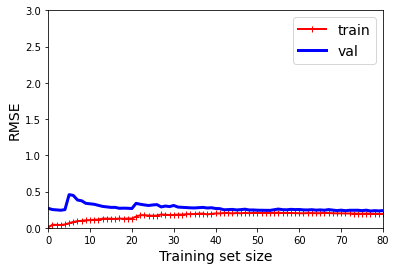

In [32]:
# sgd
plot_learning_curves(sgd_reg, fires_prepared, fires_labels)
plt.axis([0, 80, 0, 3])  # not shown in the book
plt.show()

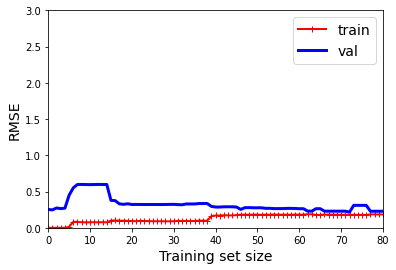

In [33]:
# dt
plot_learning_curves(tree_reg, fires_prepared, fires_labels)
plt.axis([0, 80, 0, 3])  # not shown in the book
plt.show()

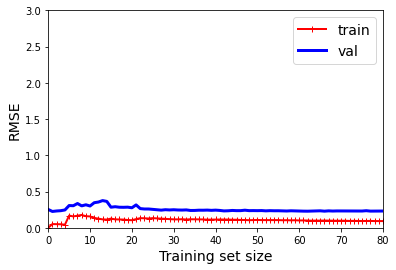

In [34]:
# rf
plot_learning_curves(forest_reg, fires_prepared, fires_labels)
plt.axis([0, 80, 0, 3])  # not shown in the book
plt.show()

# 2-4. cross_val_score 를 이용하여 RMSE score 출력하기

In [35]:
# sgd
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_reg, fires_prepared, fires_labels, scoring="neg_mean_squared_error", cv=10)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


sgd_rmse_scores = np.sqrt(-sgd_scores)
print("\nSGD Regression scores (train set): \n")
display_scores(sgd_rmse_scores)


SGD Regression scores (train set): 

Scores: [0.32234578 0.22672436 0.24668371 0.14465495 0.3180637  0.28217083
 0.36735943 0.16405528 0.26057849 0.18787977]
Mean: 0.25205163069163883
Standard deviation: 0.06902198359246961


In [36]:
# svm
svm_scores = cross_val_score(svm_reg, fires_prepared, fires_labels, scoring="neg_mean_squared_error", cv=10)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


sgd_rmse_scores = np.sqrt(-sgd_scores)
print("\nSGD Regression scores (train set): \n")
display_scores(sgd_rmse_scores)


SGD Regression scores (train set): 

Scores: [0.32234578 0.22672436 0.24668371 0.14465495 0.3180637  0.28217083
 0.36735943 0.16405528 0.26057849 0.18787977]
Mean: 0.25205163069163883
Standard deviation: 0.06902198359246961


In [37]:
# dt
tree_scores = cross_val_score(tree_reg, fires_prepared, fires_labels, scoring="neg_mean_squared_error", cv=10)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


tree_rmse_scores = np.sqrt(-tree_scores)
print("\nDT Regression scores (train set): \n")
display_scores(tree_rmse_scores)


DT Regression scores (train set): 

Scores: [0.31308313 0.21145148 0.24689604 0.15291928 0.30524811 0.27515015
 0.34438076 0.1554271  0.26539039 0.18915782]
Mean: 0.24591042711355113
Standard deviation: 0.06340962445623774


In [38]:
# rf
forest_scores = cross_val_score(forest_reg, fires_prepared, fires_labels, scoring="neg_mean_squared_error", cv=10)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


forest_rmse_scores = np.sqrt(-forest_scores)
print("\nRF Regression scores (train set): \n")
display_scores(forest_rmse_scores)


RF Regression scores (train set): 

Scores: [0.31074425 0.23174983 0.24640968 0.1855568  0.32783453 0.3019683
 0.3384158  0.20965581 0.2729009  0.20065108]
Mean: 0.2625886977528433
Standard deviation: 0.052695055696935264


# 2-5 mean_squared_error 이용 => test set 에 대해 RMSE 구하기

In [39]:
X_test = strat_test_set.drop("burned_area", axis=1)
y_test = strat_test_set["burned_area"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [40]:
# sgd
sgd_scores = cross_val_score(sgd_reg, X_test_prepared, y_test, scoring="neg_mean_squared_error", cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
print("\nSGD Regression scores (test set): \n")
display_scores(sgd_rmse_scores)


SGD Regression scores (test set): 

Scores: [0.55814268 0.37493112 0.33396046 0.15576133 0.42682731 0.53665518
 0.57761627 0.33240995 0.17653796 0.2874125 ]
Mean: 0.37602547711320244
Standard deviation: 0.1421355169447432


In [41]:
# svm
svm_scores = cross_val_score(svm_reg, X_test_prepared, y_test, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
print("\nSVM Regression scores (test set): \n")
display_scores(svm_rmse_scores)


SVM Regression scores (test set): 

Scores: [0.66911113 0.85290512 1.17915725 0.80038796 1.35047469 1.11624328
 1.17407895 1.14017421 0.73443976 0.70563339]
Mean: 0.9722605759766388
Standard deviation: 0.23212994570107784


In [42]:
# dt
tree_scores = cross_val_score(sgd_reg, X_test_prepared, y_test, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("\nDT Regression scores (test set): \n")
display_scores(tree_rmse_scores)


DT Regression scores (test set): 

Scores: [0.55814268 0.37493112 0.33396046 0.15576133 0.42682731 0.53665518
 0.57761627 0.33240995 0.17653796 0.2874125 ]
Mean: 0.37602547711320244
Standard deviation: 0.1421355169447432


In [43]:
# rf
forest_scores = cross_val_score(sgd_reg, X_test_prepared, y_test, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("\nRF Regression scores (test set): \n")
display_scores(forest_rmse_scores)


RF Regression scores (test set): 

Scores: [0.55814268 0.37493112 0.33396046 0.15576133 0.42682731 0.53665518
 0.57761627 0.33240995 0.17653796 0.2874125 ]
Mean: 0.37602547711320244
Standard deviation: 0.1421355169447432


# Keras model 개발

In [44]:
import tensorflow as tf
from tensorflow import keras

X_train, X_valid, y_train, y_valid = train_test_split(fires_prepared, fires_labels, test_size=0.2, random_state=42)
X_test = X_test_prepared
y_test = y_test

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


10/10 [==============================] - 3s 16ms/step - loss: 0.3047 - val_loss: 0.3163
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.2862 - val_loss: 0.2996
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.2713 - val_loss: 0.2851
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.2582 - val_loss: 0.2724
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 0.2468 - val_loss: 0.2608
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.2364 - val_loss: 0.2499
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.2267 - val_loss: 0.2429
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 0.2205 - val_loss: 0.2343
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 0.2129 - val_loss: 0.2272
Epoch 10/200
10/10 [==============================] - 0s 4ms/step - loss: 0.2065 - val_loss: 0.2215
Epoch 11/200
10/10 [

Epoch 1/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0884 - val_loss: 0.0979
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 0.0978
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0881 - val_loss: 0.0977
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 0.0976
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 0.0974
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 0.0973
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0876 - val_loss: 0.0971
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 0.0969
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 0.0968
Epoch 10/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0872 - val_loss: 0.0967
Epoch 11/

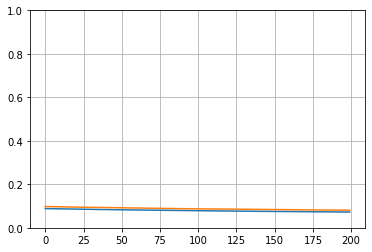

In [45]:
# Learning curves: train set (blue line), validation set (orange line)
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
print("learning curves")
plt.show()

In [46]:
import os
model_version = "0001"
model_name = "my_sanbul_model"
model_path = os.path.join(model_name, model_version)
print("\nmodel_path: \n", model_path)

tf.saved_model.save(model, model_path)

for root, dirs, files in os.walk(model_name):
    indent = ' ' * root.count(os.sep)
    print('{}{}/'.format(indent, os.path.basename(root)))
for filename in files:
    print('{}{}'.format(indent + ' ', filename))



model_path: 
 my_sanbul_model/0001
INFO:tensorflow:Assets written to: my_sanbul_model/0001/assets
my_sanbul_model/
 0001/
  assets/
  variables/
   variables.index
   variables.data-00000-of-00001
